In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# three stage 

 # get the depth image w/o object
 # controlnet a table 

 # inpaint the background around the table.

# get the depth image of the object
# crop 
# controlnet the object

# paste on the table


In [4]:
from dsd.cropped_diffusion_rendering import CropAndInpaintRenderer, CroppedRenderer, DualInpainting
from dsd.diffusion_rendering import SD2FromDepthRenderer, SD2InpaintingRenderer

In [5]:
inpainter = SD2InpaintingRenderer(1)
renderer = SD2FromDepthRenderer(1)

/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
cropped_renderer = CroppedRenderer(renderer)
crop_and_inpaint_renderer = CropAndInpaintRenderer(cropped_renderer, inpainter,0)
dual_inpainting = DualInpainting(inpainter,0)


In [7]:
data_dir = "/home/tlips/Documents/diffusing-synthetic-data/data/scenes/mugs/2024-06-26_15-27-03/4fbb57124fec47d8b216101e19f5d385/000"

mug_prompt = "a blue mug with an image of a flower"
background_prompt = "an oak table in a living room"
from dsd.diffusion_rendering import DiffusionRenderInputImages

input_images = DiffusionRenderInputImages.from_render_dir(data_dir)
table_input_images = DiffusionRenderInputImages.from_render_dir(data_dir+"/table_only")

In [ ]:
table_images = crop_and_inpaint_renderer(background_prompt,background_prompt,table_input_images)

torch.Size([1, 512, 512])


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [11]:
dual_inpainted = dual_inpainting(mug_prompt,background_prompt,input_images)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

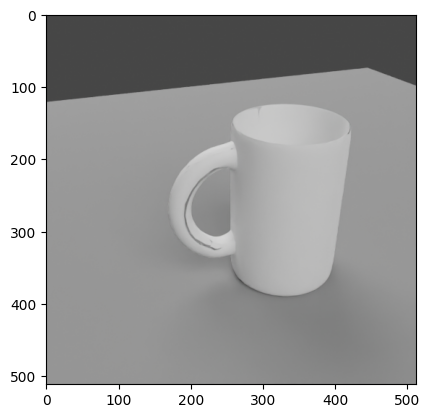

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(input_images.rgb_image)


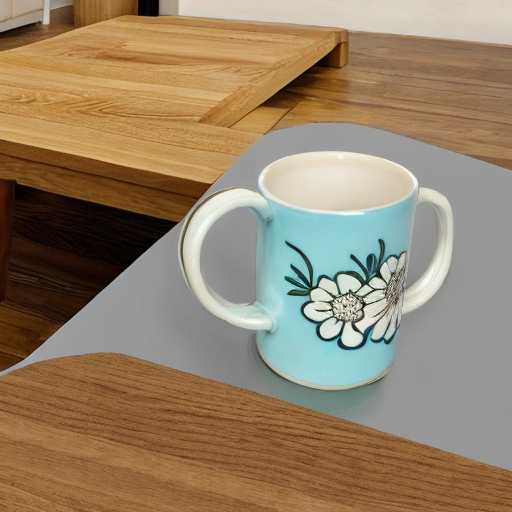

In [12]:
dual_inpainted[0]

torch.Size([1, 512, 512])


  0%|          | 0/50 [00:00<?, ?it/s]

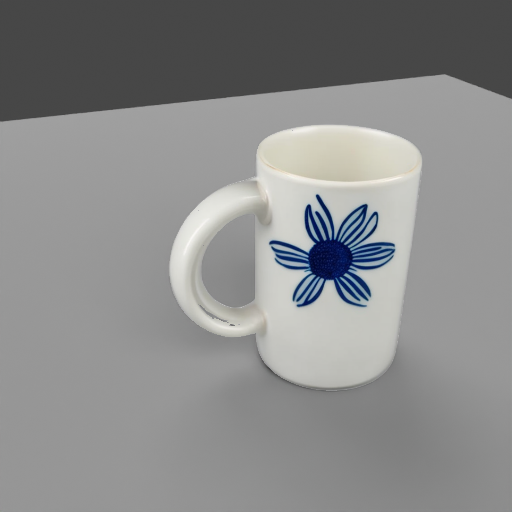

In [ ]:
object_images = cropped_renderer(mug_prompt,input_images)
object_images[0]

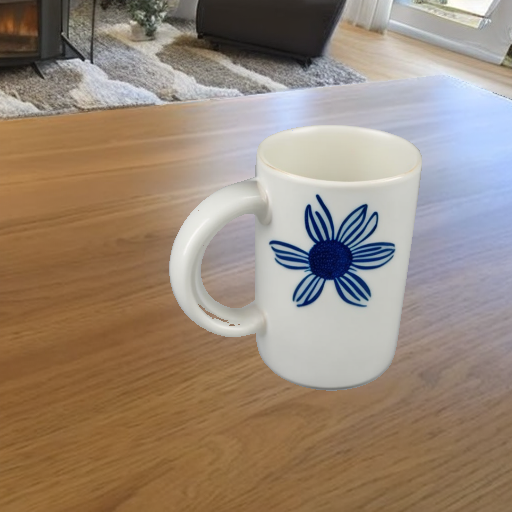

In [ ]:
from PIL import Image
import numpy as np 
resulting_images = []
for object_image, table_image in zip(object_images, table_images):
    res = Image.composite(object_image, table_image,Image.fromarray((input_images.mask*255).astype(np.uint8)))
    resulting_images.append(res)

resulting_images[0]
